# Implementing a Perceptron

## 1) Installing Libraries

In [1]:
import os
os.chdir(os.path.join(os.path.expanduser('~'), 'dl-fundamentals', 'dl', 'data'))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2) Loading the Dataset

In [2]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [3]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [4]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [5]:
X_train.shape

(20, 2)

In [6]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
y_train.shape

(20,)

In [8]:
np.bincount(y_train)

array([10, 10])

## 3) Visualizing the dataset

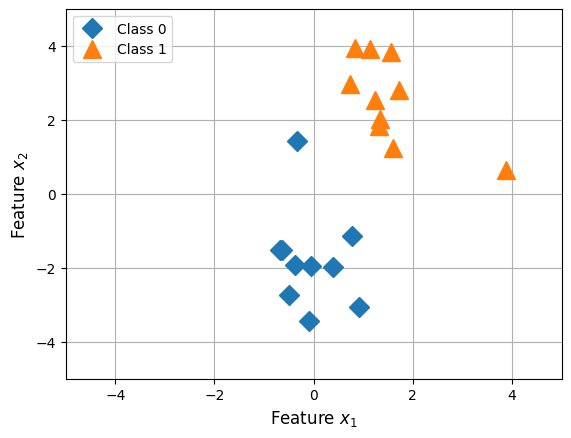

In [9]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the Perceptron

In [10]:
class Perceptron:
    def __init__(self, num_features, alpha=1.0):
        self.num_features = num_features
        # 🚨 random weights
        self.weights = np.random.uniform(-0.01, 0.01, num_features).tolist()
        self.bias = np.random.uniform(-0.01, 0.01)
        # 🚨 learing rate
        self.alpha = alpha

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        self.bias += self.alpha * error
        for i, _ in enumerate(self.weights):
            self.weights[i] += self.alpha * error * x[i]

        return error

In [11]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")
        
        # 🚨 early stopping
        if error_count == 0:
            break

In [12]:
ppn = Perceptron(num_features=2, alpha=0.5)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)
print("\nWeights:", ppn.weights)

Epoch 1 errors 3
Epoch 2 errors 1
Epoch 3 errors 0

Weights: [1.8055568962335264, 0.42396116514706716]


## 5) Evaluating the results

In [13]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [14]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [15]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


## 6) Optional: Visualizing the Decision Boundary

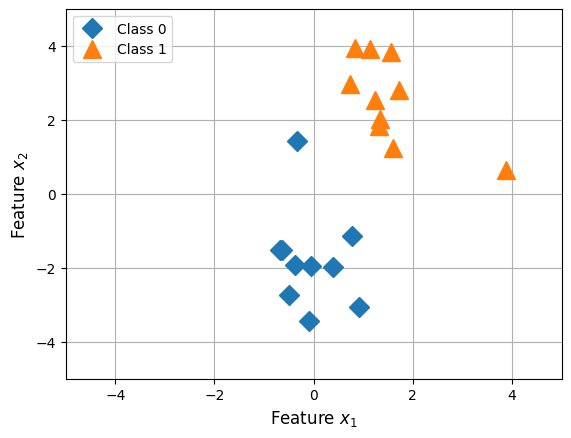

In [16]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [17]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

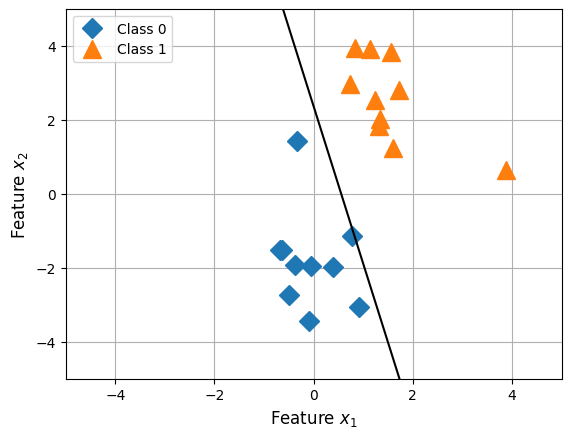

In [18]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()